In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt


import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg
from sympy import *
from tqdm import tqdm

from integrator_functions import euler_integrator_step, vel_verlet_integrator_step, leap_frog_integrator_step, acf


np.random.seed(0)

font = {'size'   : 10}
plt.rc('font', **font)
in2cm = 1/2.54  # centimeters in inches

In [2]:
# System parameters
kB    = 0.008314463 # kJ mol-1 K
T     = 300         # K
beta  = 1 / kB / T  # kJ-1 mol
M     = 1           # amu

# Convergence of the memory kernel to $e^{-\alpha t}$

The $i$th particle, with mass $m_i$ and spring constant $k_i$, oscillates with frequency

$$
\omega_i = \sqrt{\frac{k_i}{m_i}} \, .
$$

The frequencies are drawn from a uniform distribution:

$$
\omega_i = N^a \nu_i\,; \quad \nu_i \in \mathcal{U}(0,1)\,; \quad a \in[0,1]
$$

The spring constants are written as

$$
    k_i = \frac{2 }{\pi} \frac{\alpha^2 \gamma}{\alpha^2 + \omega_i^2} \Delta \omega \, ,
$$

where 

$$
\Delta \omega = \frac{N^a}{N} \, .
$$

The memory kernel is written as

$$
K(t) = \sum_{i=1}^N \frac{2}{\pi} \frac{\alpha^2 M \gamma}{\alpha^2 + \omega_i^2} \, \Delta \omega 
$$

We show that 

$$
\lim_{N\rightarrow \infty}
\sum_{i=1}^N \frac{2}{\pi} \frac{\alpha^2 M \gamma}{\alpha^2 + \omega_i^2} \, \Delta \omega
=
\frac{1}{\bar{\beta}}e^{-\alpha t}
$$

In [3]:
a       = 0.3333

gamma   = 1.5
alpha   = 1

# Angular frequencies
def ang_freqs(omega, N):
    
    domega = N**a / N
    return ( 2 / np.pi ) * ( alpha ** 2 * M * gamma ) / ( alpha ** 2  + omega ** 2) * domega

# Memory kernel
def memory_kernel1( t, omega, k_spring ):

    return np.sum(  k_spring * np.cos( omega * t ) )

def f(t):
    return alpha * M * gamma * np.exp( - alpha * t )

0.10101010101010101


100it [00:00, ?it/s]
100it [00:00, 12500.53it/s]
100it [00:00, 211.40it/s]


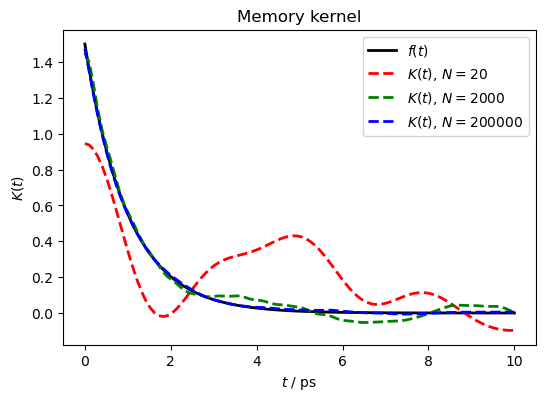

In [4]:
# Timeline
tmin    = 0
tmax    = 10
Nsteps  = 100
tvalues = np.linspace( 0, tmax, Nsteps )
dt      = tvalues[1] - tvalues[0]
print(dt)

# Number of oscillators
Noscillators = np.array([20, 2000, 200000])        

K = np.zeros((Nsteps,3))

for i,N in enumerate(Noscillators):

    omega    = np.random.uniform( 0, 1, N ) * N ** a
    k_spring = ang_freqs(omega, N)
    
    for k,t in tqdm(enumerate(tvalues)):
        K[k,i] = memory_kernel1( t, omega, k_spring )

    
fig, ax = plt.subplots(1, 1,figsize=(12*in2cm, 8*in2cm))  
ax.plot(tvalues, f(tvalues), 'k-', linewidth = 2,   label =r'$f(t)$')
ax.plot(tvalues, K[:,0], 'r--',    linewidth = 2,   label =r'$K(t),\, N=20$')
ax.plot(tvalues, K[:,1], 'g--',    linewidth = 2,   label =r'$K(t),\, N=2000$')
ax.plot(tvalues, K[:,2], 'b--',    linewidth = 2,   label =r'$K(t),\, N=200000$')

ax.set_xlabel(r'$t$ / ps')
ax.set_ylabel(r'$K(t)$')

ax.set_title('Memory kernel')
ax.legend()
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.3, hspace=0.3)

fig.savefig('figures/memory_kernel1.png', format='png', dpi=900, bbox_inches='tight')

# Convergence of $e^{-\alpha t}$ to a delta function
In what follows, we assume an infinite number of oscillators, then the memory kernel can be written as

$$
K(t) = \alpha M \gamma e^{-\alpha t} 
$$

100it [00:00, ?it/s]
100it [00:00, 24998.83it/s]
100it [00:00, 25009.27it/s]


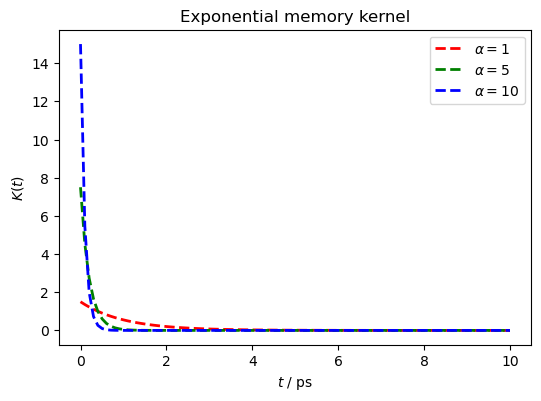

In [5]:
a       = 0.3333

gamma   = 1.5
alphas   = np.array([1,5,10])

def memory_kernel2(t, alpha):
    return alpha * M * gamma * np.exp( - alpha * t )

K = np.zeros((Nsteps,3))

for i,alpha in enumerate(alphas):

    for k,t in tqdm(enumerate(tvalues)):
        K[k,i] = memory_kernel2( t, alpha )

    
fig, ax = plt.subplots(1, 1,figsize=(12*in2cm, 8*in2cm))  
ax.plot(tvalues, K[:,0], 'r--',    linewidth = 2,   label =r'$\alpha = 1$')
ax.plot(tvalues, K[:,1], 'g--',    linewidth = 2,   label =r'$\alpha = 5$')
ax.plot(tvalues, K[:,2], 'b--',    linewidth = 2,   label =r'$\alpha = 10$')

ax.set_xlabel(r'$t$ / ps')
ax.set_ylabel(r'$K(t)$')

ax.set_title('Exponential memory kernel')
ax.legend()
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.3, hspace=0.3)

fig.savefig('figures/memory_kernel2.png', format='png', dpi=900, bbox_inches='tight')